In [2]:
# 1.1: Import the modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
cars_df = pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/car-prices.csv")
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
#  Display the first 25 rows of the 'CarName' column.
cars_df['CarName'].head(25)

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
20         chevrolet vega 2300
21               dodge rampage
22         dodge challenger se
23                  dodge d200
24           dodge monaco (sw)
Name: CarName, dtype: object

In [5]:
#  Extract the name of the manufactures from the car names and display the first 25 cars to verify whether names are extracted successfully.
car_companies = pd.Series([car.split(" ")[0] for car in cars_df['CarName']], index = cars_df.index)
car_companies.head(25)

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
dtype: object

In [6]:
# Create a new column named 'car_company'. It should store the company names of a the cars.
cars_df['car_company'] = car_companies
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [7]:
# Get the count of number of the cars sold be each manufacturer in the dataset.
cars_df['car_company'].value_counts()

car_company
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [8]:
# Replace the misspelled 'car_company' names with their correct names.

# volkswagen
cars_df.loc[(cars_df['car_company'] == "vw") | (cars_df['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'

# porsche
cars_df.loc[cars_df['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars_df.loc[cars_df['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars_df.loc[cars_df['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars_df.loc[cars_df['car_company'] == "maxda", 'car_company'] = 'mazda'

In [9]:
# Get the count of number of the cars sold be each manufacturer in the dataset again
cars_df['car_company'].value_counts()

car_company
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [10]:
# Drop 'CarName' column from the 'cars_df' DataFrame.
cars_df.drop(columns= ['CarName'], axis = 1, inplace = True)

In [11]:
# Print the names of the columns to verify whether the 'CarName' column is dropped or not.
cars_df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'car_company'],
      dtype='object')

In [12]:
# Extract all the numeric (float and int type) columns from the dataset.
cars_numeric_df = cars_df.select_dtypes(include = ['int64', 'float64'])
cars_numeric_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
# Drop the 'car_ID' column from the 'cars_numeric_df' DataFrame. 
cars_numeric_df.drop(columns = ['car_ID'], axis = 1, inplace = True)
cars_numeric_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


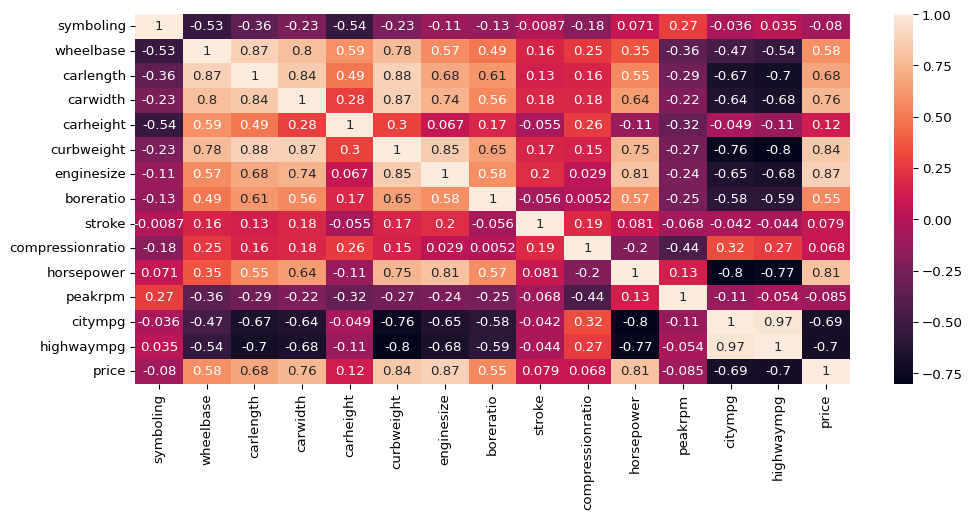

In [14]:
# Draw a correlation heatmap between the numeric features.
plt.figure(figsize = (12, 5), dpi = 96)
sns.heatmap(cars_numeric_df.corr(), annot=True)
plt.show()

In [15]:
# Count the occurrence of each value in the 'cylindernumber' column.
cars_df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [16]:
# Count the occurrence of each value in the 'doornumber' column.
cars_df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [17]:
# Use the 'map()' function to replace a words in a Pandas series to their corresponding numeric values.
words = pd.Series(["two", "three", "four", "five", "six", "eight", "twelve"])
words_dict = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}
cars_df['cylindernumber']=cars_df['cylindernumber'].map(words_dict)
cars_df['doornumber']=cars_df['doornumber'].map(words_dict)

In [18]:
# Display the first five rows of the 'cylindernumber' and 'doornumber' columns. Also, check whether the data-types are integer or not.
print(cars_df[['cylindernumber', 'doornumber']].head())
print(cars_df[['cylindernumber', 'doornumber']].info())

   cylindernumber  doornumber
0               4           2
1               4           2
2               6           2
3               4           4
4               5           4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   cylindernumber  205 non-null    int64
 1   doornumber      205 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB
None


Feature Encoding

In [19]:
#  Get the counts of each of the values in the 'carbody' column.
cars_df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [20]:
# T1.1: Create dummy variables for the 'carbody' columns.
car_body_dummies = pd.get_dummies(cars_df['carbody'], dtype = int)
car_body_dummies

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [21]:
# S1.2: Check whether the data-types for these dummy columns is integer or not.
car_body_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   convertible  205 non-null    int32
 1   hardtop      205 non-null    int32
 2   hatchback    205 non-null    int32
 3   sedan        205 non-null    int32
 4   wagon        205 non-null    int32
dtypes: int32(5)
memory usage: 4.1 KB


In [22]:
# S1.3: Create dummy variables for the 'carbody' columns with 1 column less.
car_body_new_dummies = pd.get_dummies(cars_df['carbody'], drop_first = True, dtype = int)
car_body_new_dummies

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
200,0,0,1,0
201,0,0,1,0
202,0,0,1,0
203,0,0,1,0


In [23]:
# S1.4: Create a DataFrame containing all the non-numeric type features.
cars_categorical_df = cars_df.select_dtypes(include = ['object'])
cars_categorical_df.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [24]:
# S1.5: Get dummy variables for all the categorical type columns using the dummy coding process.
cars_dummies_df = pd.get_dummies(cars_categorical_df, drop_first = True, dtype = int)
cars_dummies_df.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# S1.6: Drop the categorical type columns from the 'cars_df' DataFrame.
cars_df.drop(list(cars_categorical_df.columns), axis = 1, inplace = True)

In [26]:
# S1.7: Concatenate the 'cars_df' and 'cars_dummies_df' DataFrames.
cars_df = pd.concat([cars_df, cars_dummies_df], axis = 1)
cars_df.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# S1.8: Drop the 'car_ID' column
cars_df.drop('car_ID', axis = 1, inplace = True)

In [28]:
# S1.9: Get the data-types of all the columns and the number of rows and columns in the 'cars_df' DataFrame.
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   doornumber              205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   carlength               205 non-null    float64
 4   carwidth                205 non-null    float64
 5   carheight               205 non-null    float64
 6   curbweight              205 non-null    int64  
 7   cylindernumber          205 non-null    int64  
 8   enginesize              205 non-null    int64  
 9   boreratio               205 non-null    float64
 10  stroke                  205 non-null    float64
 11  compressionratio        205 non-null    float64
 12  horsepower              205 non-null    int64  
 13  peakrpm                 205 non-null    int64  
 14  citympg                 205 non-null    in

In [29]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\shwet\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [30]:
# Split the 'cars_df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
X = cars_df.drop(columns = 'price')
y = cars_df['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=42)

Feature Scaling

In [31]:
def standard_norm(series):
  new_series = (series - series.mean()) / series.std()
  return new_series

# Normalising the features in train and test sets.
X_train[X_train.columns[:16]] = X_train[X_train.columns[:16]].apply(standard_norm, axis = 0)
X_test[X_test.columns[:16]] = X_test[X_test.columns[:16]].apply(standard_norm, axis = 0)
X_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
177,-1.494746,0.884304,0.571301,0.076145,0.234282,0.043705,-0.220606,-0.361807,-0.121004,-0.038773,...,0,0,0,0,0,0,0,1,0,0
75,0.124562,-1.122925,0.620694,0.301819,0.921744,0.406597,0.644684,-0.361807,0.313395,1.687015,...,0,0,0,0,0,0,0,0,0,0
174,-1.494746,0.884304,0.571301,0.076145,0.234282,0.446919,-0.178490,-0.361807,-0.410604,-0.185649,...,0,0,0,0,0,0,0,1,0,0
31,0.934216,-1.122925,-2.030063,-2.422386,-0.957319,-1.206257,-1.443881,-0.361807,-0.845003,-1.507529,...,0,0,0,0,0,0,0,0,0,0
12,-0.685092,-1.122925,0.373729,0.172863,-0.544842,0.204990,0.261812,1.392037,0.892594,-0.038773,...,0,0,0,0,0,0,0,0,0,0


Model Building using the statsmodels.api module.

In [32]:
# Build a linear regression model using all the features to predict car prices.
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, X_train_sm).fit()
lin_reg.params

const                     1.111326e+04
symboling                -2.592601e+02
doornumber                2.563005e+02
wheelbase                 4.621973e+02
carlength                -6.274075e+02
carwidth                  1.488550e+03
carheight                -3.300812e+02
curbweight                2.138008e+03
cylindernumber           -8.478692e+02
enginesize                4.083022e+03
boreratio                -1.027673e+03
stroke                   -7.593749e+01
compressionratio          4.652682e+02
horsepower                2.562853e+02
peakrpm                   8.317857e+02
citympg                   6.391211e+02
highwaympg               -2.399637e+02
fueltype_gas              6.290680e+03
aspiration_turbo          2.528179e+03
carbody_hardtop          -2.337527e+02
carbody_hatchback        -3.517083e+03
carbody_sedan            -3.523827e+03
carbody_wagon            -4.154162e+03
drivewheel_fwd           -8.505823e+02
drivewheel_rwd           -1.393007e+03
enginelocation_rear      

In [33]:
# Print the summary of the linear regression report.
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     67.51
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           3.52e-53
Time:                        16:44:30   Log-Likelihood:                -1214.5
No. Observations:                 143   AIC:                             2541.
Df Residuals:                      87   BIC:                             2707.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.11

In [34]:
#  Calculate the adjusted R-square value using the above formula.
num_rows = X_train.shape[0] # Number of rows or instances 
num_predictors = X_train.shape[1] # Number of columns or feature (or independent) variables
r2_score = lin_reg.rsquared # R-squared (or coefficient of determination) value 
adj_r2_score = 1 - ((1 - r2_score) * (num_rows - 1))/(num_rows - num_predictors - 1) # Adjusted R-squared calculation
adj_r2_score

0.9608296579974196

In [35]:
# Create a Python dictionary storing the moderately to highly correlated features with price and the corresponding correlation values.
major_features = {}
for f in X:
  corr_coef = np.corrcoef(cars_df['price'], cars_df[f])[0, 1]
  if (corr_coef >= 0.5) or (corr_coef <= -0.5):
    major_features[f] = corr_coef

print("Number of features moderately to highly correlated with price =", len(major_features), "\n")
major_features

Number of features moderately to highly correlated with price = 15 



{'wheelbase': 0.5778155982921496,
 'carlength': 0.6829200156779628,
 'carwidth': 0.7593252997415119,
 'curbweight': 0.8353048793372965,
 'cylindernumber': 0.7183049020002816,
 'enginesize': 0.8741448025245112,
 'boreratio': 0.5531732367984434,
 'horsepower': 0.8081388225362212,
 'citympg': -0.68575133602704,
 'highwaympg': -0.6975990916465566,
 'drivewheel_fwd': -0.6019502965330914,
 'drivewheel_rwd': 0.6389565386618764,
 'fuelsystem_2bbl': -0.5013743424965753,
 'fuelsystem_mpfi': 0.5170749892680737,
 'car_company_buick': 0.515094050057132}

In [36]:
# S2.1: Use RFE to select only 5 features to predict the price of a car.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# RFE with 5 features.
skl_lin_reg2 = LinearRegression()
rfe2 = RFE(skl_lin_reg2, n_features_to_select=5)

# Fit with 5 features.
rfe2.fit(X_train[major_features.keys()], y_train)

# Print the attributes.
print(major_features.keys(), "\n")
print(rfe2.support_, "\n")           
print(rfe2.ranking_, "\n")  

dict_keys(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'car_company_buick']) 

[False False  True False False  True False  True False False  True False
 False False  True] 

[10  8  1  9  3  1  4  1  6  5  1 11  7  2  1] 



In [37]:
# Print the 5 features selected by RFE in the previous step.
rfe_features = X_train[major_features.keys()].columns[rfe2.support_]
rfe_features

Index(['carwidth', 'enginesize', 'horsepower', 'drivewheel_fwd',
       'car_company_buick'],
      dtype='object')

In [38]:
#  Build the linear regression model again using the most recently selected features by RFE
import statsmodels.api as sm

# Subset the train set such that it contains only the above 5 selected features.
X_train_rfe2 = X_train[rfe_features]

# Add the 'const' column to the features set.
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fit the model with 5 features.
sm_lin_reg2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(sm_lin_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           2.00e-58
Time:                        16:44:31   Log-Likelihood:                -1339.8
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     137   BIC:                             2709.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.436e+04    427.39

In [39]:
#  Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,4.18
3,horsepower,3.35
0,const,3.11
1,carwidth,2.16
4,drivewheel_fwd,1.49
5,car_company_buick,1.46


In [40]:
# Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
print("Train set")
print('-' * 50)
X_train_final = X_train_rfe2.drop(columns = 'const')
sk_lin_reg_final = LinearRegression().fit(X_train_final, y_train)
y_train_pred = sk_lin_reg_final.predict(X_train_final)
train_r2_score = r2_score(y_train, y_train_pred)
train_adj_r2_score = 1 - (1 - train_r2_score) * (X_train_final.shape[0] - 1)/(X_train_final.shape[0] - X_train_final.shape[1] - 1)

print(f"R-squared = {train_r2_score:.3f}")
print(f"Adjusted R-squared = {train_adj_r2_score:.3f}")
print(f"Mean absolute error = {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"Mean squared error = {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root mean squared error = {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"Mean squared log error = {mean_squared_log_error(y_train, y_train_pred):.3f}")

Train set
--------------------------------------------------
R-squared = 0.868
Adjusted R-squared = 0.863
Mean absolute error = 2080.494
Mean squared error = 8042954.083
Root mean squared error = 2836.010
Mean squared log error = 0.034


Mean of residuals = 0.000



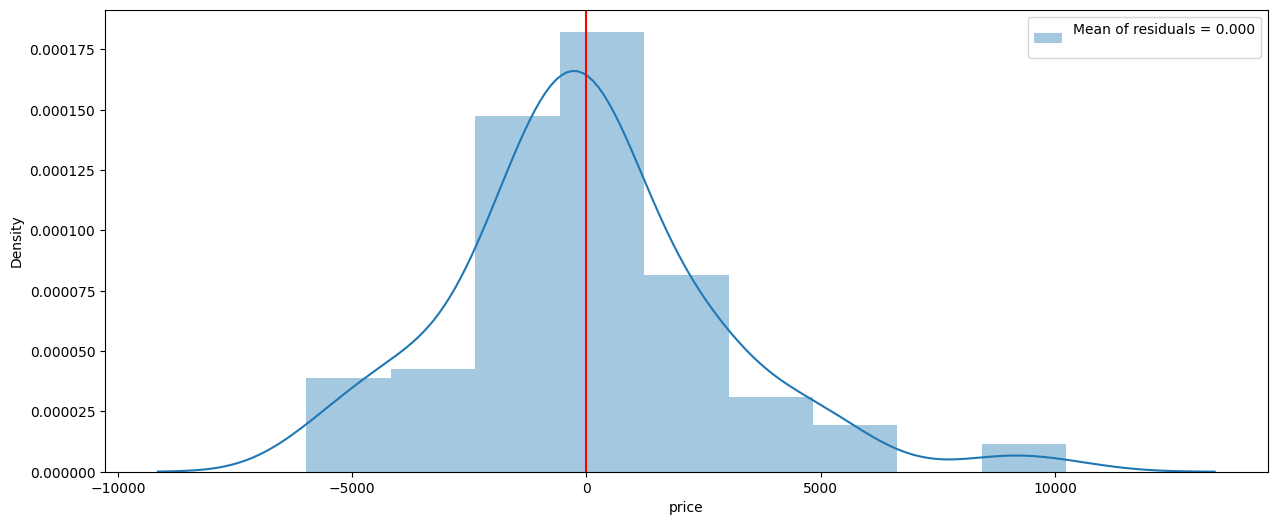

In [41]:
# Create a histogram for the errors obtained in the predicted values for the train set.
import warnings
warnings.filterwarnings('ignore')
train_residuals = y_train - y_train_pred
print(f"Mean of residuals = {np.mean(train_residuals):.3f}\n")

plt.figure(figsize = (15, 6))
sns.distplot(train_residuals, bins = 'sturges', label = f"Mean of residuals = {np.mean(train_residuals):.3f}\n")
plt.axvline(x = np.mean(train_residuals), color = 'red')
plt.legend()
plt.show()

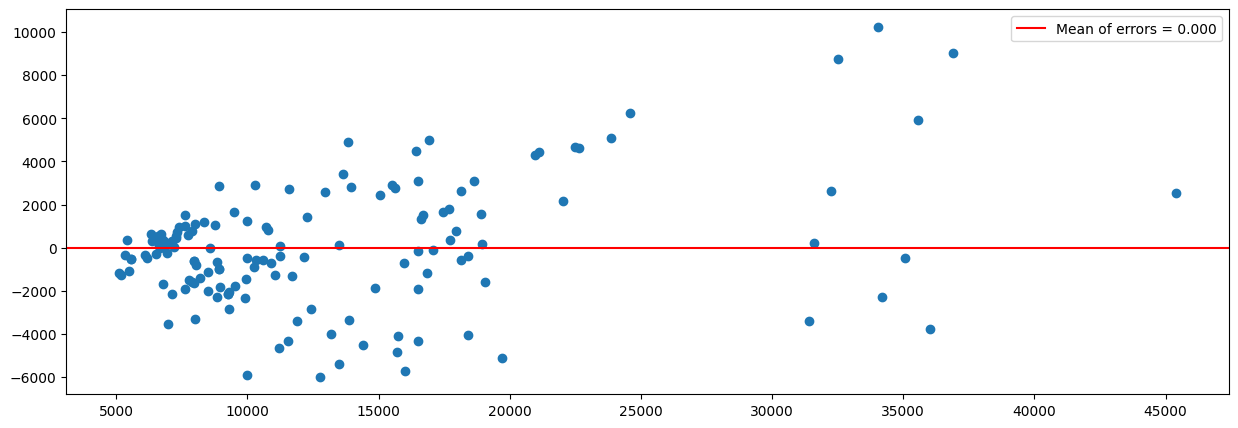

In [42]:
#  Create a scatter plot between 'train_residuals' and 'y_train'.
plt.figure(figsize = (15, 5))
plt.scatter(y_train, train_residuals)
plt.axhline(y = train_residuals.mean(), color = 'r', label = f'Mean of errors = {train_residuals.mean():.3f}')
plt.legend()
plt.show()

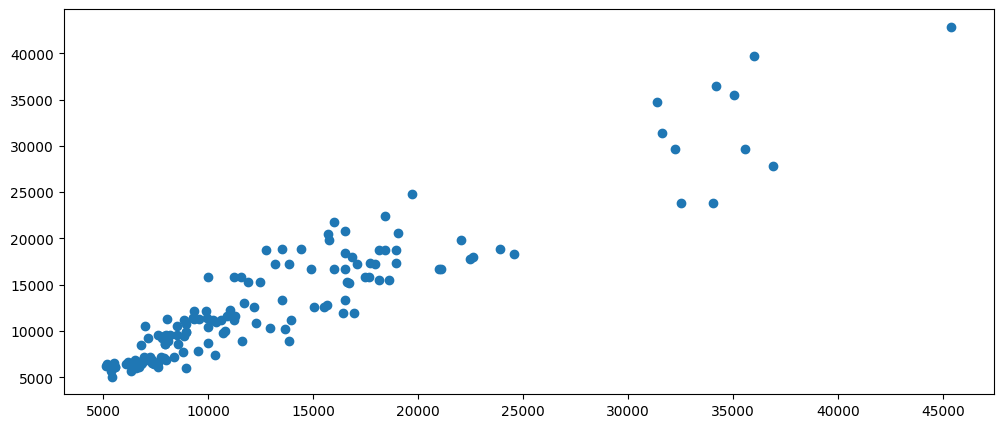

In [43]:
# Create a scatter plot for actual values and predictions of the training data set
plt.figure(figsize = (12, 5))
plt.scatter(y_train, y_train_pred)
plt.show()

In [44]:
# S4.1: Predict the car prices on the test set.
X_test = X_test[X_train_final.columns]
y_test_pred = sk_lin_reg_final.predict(X_test)

#  Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error', 'mean_squared_log_error' functions of the 'sklearn' module.
print("Test set")
print('-' * 50)

test_r2_score = r2_score(y_test, y_test_pred)
test_adj_r2_score = 1 - (1 - test_r2_score) * (X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)

print(f"R-squared = {test_r2_score:.3f}")
print(f"Adjusted R-squared = {test_adj_r2_score:.3f}")
print(f"Mean absolute error = {mean_absolute_error(y_test, y_test_pred):.3f}")
print(f"Mean squared error = {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root mean squared error = {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"\nMean squared log error = {mean_squared_log_error(y_test, y_test_pred):.3f}")

Test set
--------------------------------------------------
R-squared = 0.791
Adjusted R-squared = 0.772
Mean absolute error = 2566.663
Mean squared error = 14513862.919
Root mean squared error = 3809.706

Mean squared log error = 0.133


Mean of residuals = -694.585



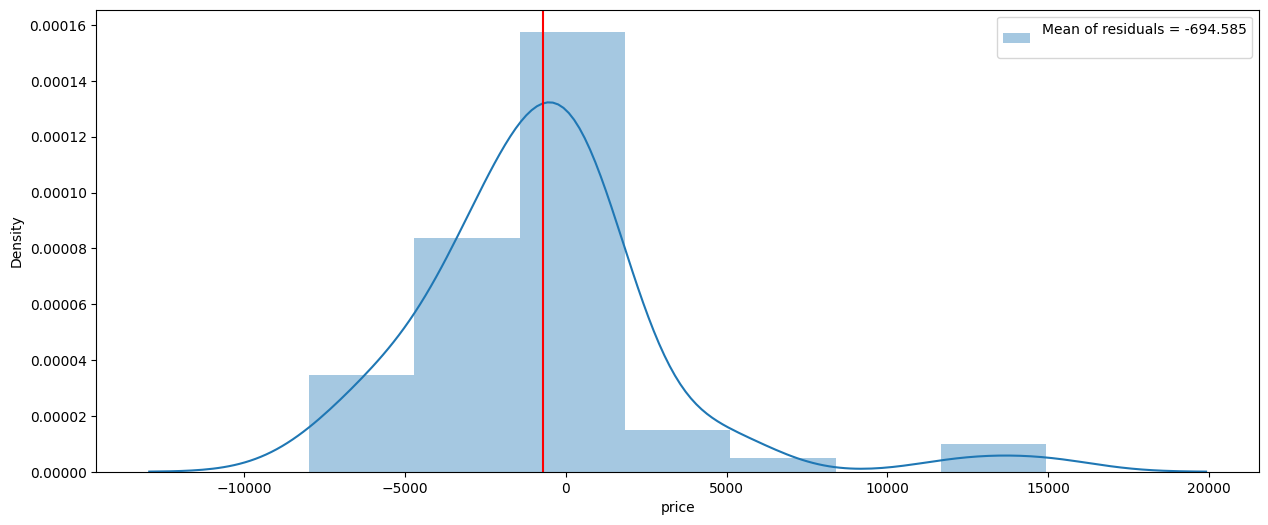

In [45]:
#  Create a histogram for the errors obtained in the predicted values for the testing set.
test_residuals = y_test - y_test_pred
print(f"Mean of residuals = {np.mean(test_residuals):.3f}\n")

plt.figure(figsize = (15, 6))
sns.distplot(test_residuals, bins = 'sturges', label = f"Mean of residuals = {np.mean(test_residuals):.3f}\n")
plt.axvline(x = np.mean(test_residuals), color = 'red')
plt.legend()
plt.show()

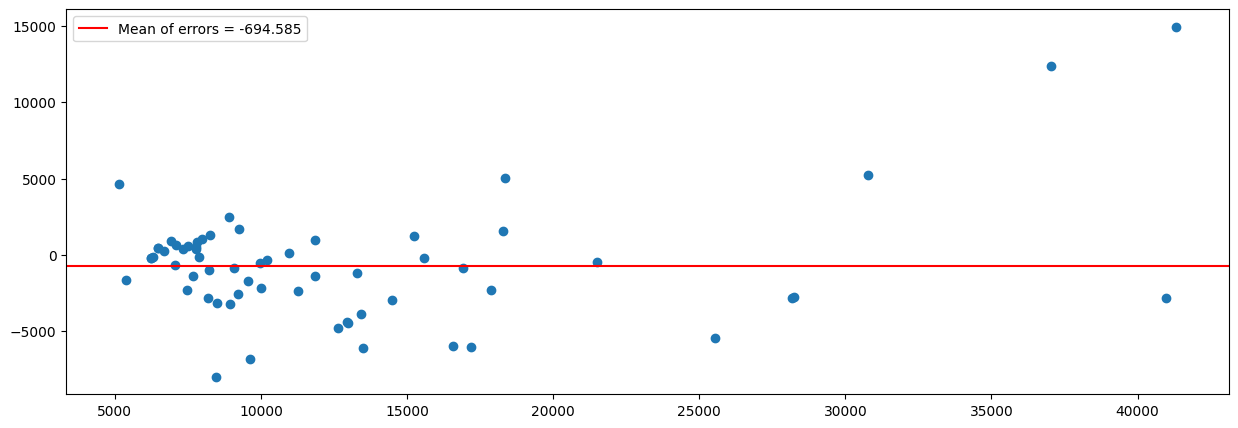

In [46]:
#  Create a scatter plot for the errors obtained in the actual values for the test set for checking homoscedasticity .
plt.figure(figsize = (15, 5))
plt.scatter(y_test, test_residuals)
plt.axhline(y = test_residuals.mean(), color = 'r', label = f'Mean of errors = {test_residuals.mean():.3f}')
plt.legend()
plt.show()

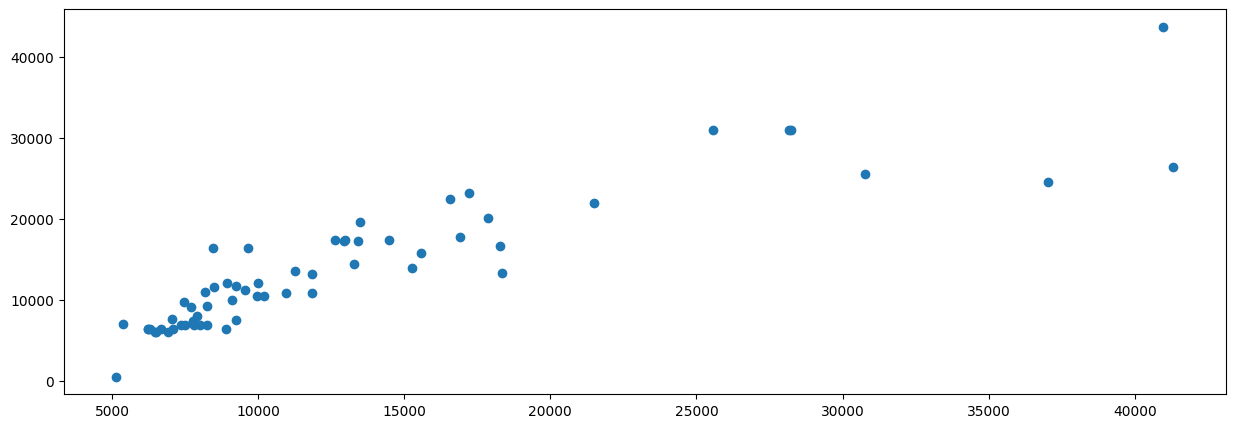

In [47]:
#  Create a scatter plot for the actual values and the predictions of the testing dataset.
plt.figure(figsize = (15, 5))
plt.scatter(y_test, y_test_pred)
plt.show()

This scatter plot between the actual and predicted prices follow somewhat straight line which suggests that most of the predicted prices are close to the actual prices of a car.

So finally the most important features and their corresponding regression coeffients are

Feature	Coefficient
carwidth	1696.2271
enginesize	2636.6328
horsepower	2363.8354
drivewheel_fwd	-2016.6827
car_company_buick	7984.8761
Hence, the regression equation is

Y=14360+1696.2271x1+2636.6328x2+2363.8354x3−2016.6827x4+7984.8761x5 

where

Y  is the price of a car

x1  is carwidth

x2  is enginesize

x3  is horsepower

x4  is drivewheel_fwd

x5  is car_company_buick

This concludes linear regression. 